In [36]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
df_gr_da = df[(df['job_country'] == 'Greece') & (df['job_title_short'] == 'Data Analyst')].copy()
df_gr_da['job_posted_no_month'] = df_gr_da['job_posted_date'].dt.month
df_gr_da_skills = df_gr_da.explode('job_skills')


In [38]:
df_gr_da_pivot = df_gr_da_skills.pivot_table(index='job_posted_no_month', columns='job_skills', aggfunc='size', fill_value=0)
df_gr_da_pivot.loc['Total'] = df_gr_da_pivot.sum()
df_gr_da_pivot = df_gr_da_pivot[df_gr_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_gr_da_pivot = df_gr_da_pivot.drop('Total')
df_gr_da_pivot


job_skills,sql,excel,python,power bi,sas,tableau,r,oracle,java,sap,...,flask,seaborn,jupyter,kubernetes,nuix,postgresql,powershell,splunk,react,yarn
job_posted_no_month,,,,,,,,,,,,,,,,,,,,,
1,24,16,10,14,10,5,9,4,4,2,...,0,0,0,0,0,0,0,0,0,0
2,28,19,10,16,14,6,8,6,5,2,...,0,0,0,0,0,0,0,0,0,0
3,21,13,8,15,4,6,7,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,23,16,14,8,14,14,6,6,7,4,...,0,0,0,0,0,0,0,0,0,0
5,22,17,15,11,10,12,7,4,4,7,...,0,0,0,0,0,0,0,0,0,0
6,30,18,15,13,10,12,9,9,5,4,...,0,0,0,0,0,0,0,0,0,0
7,19,18,11,13,6,9,6,4,6,5,...,0,0,0,0,0,0,0,0,0,0
8,9,10,6,8,4,3,2,1,1,4,...,1,0,0,1,0,0,0,0,0,0
9,14,19,4,9,6,7,4,7,2,7,...,0,0,1,0,1,0,1,0,0,0


In [39]:
da_totals = df_gr_da.groupby('job_posted_no_month').size()

In [40]:
df_gr_da_perc = df_gr_da_pivot.div(da_totals/100, axis=0)

In [41]:
df_gr_da_perc = df_gr_da_perc.reset_index()
df_gr_da_perc['job_posted_month'] = df_gr_da_perc['job_posted_no_month'].apply(lambda x:pd.to_datetime(x, format='%m').strftime('%b'))
df_gr_da_perc = df_gr_da_perc.set_index('job_posted_month')
df_gr_da_perc = df_gr_da_perc.drop(columns='job_posted_no_month')
df_gr_da_perc

job_skills,sql,excel,python,power bi,sas,tableau,r,oracle,java,sap,...,flask,seaborn,jupyter,kubernetes,nuix,postgresql,powershell,splunk,react,yarn
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,46.153846,30.769231,19.230769,26.923077,19.230769,9.615385,17.307692,7.692308,7.692308,3.846154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,62.222222,42.222222,22.222222,35.555556,31.111111,13.333333,17.777778,13.333333,11.111111,4.444444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,47.727273,29.545455,18.181818,34.090909,9.090909,13.636364,15.909091,2.272727,0.000000,2.272727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.272727,0.000000,0.000000
Apr,57.500000,40.000000,35.000000,20.000000,35.000000,35.000000,15.000000,15.000000,17.500000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,44.000000,34.000000,30.000000,22.000000,20.000000,24.000000,14.000000,8.000000,8.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,57.692308,34.615385,28.846154,25.000000,19.230769,23.076923,17.307692,17.307692,9.615385,7.692308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,51.351351,48.648649,29.729730,35.135135,16.216216,24.324324,16.216216,10.810811,16.216216,13.513514,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,40.909091,45.454545,27.272727,36.363636,18.181818,13.636364,9.090909,4.545455,4.545455,18.181818,...,4.545455,0.000000,0.000000,4.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,42.424242,57.575758,12.121212,27.272727,18.181818,21.212121,12.121212,21.212121,6.060606,21.212121,...,0.000000,0.000000,3.030303,0.000000,3.030303,0.000000,3.030303,0.000000,0.000000,0.000000


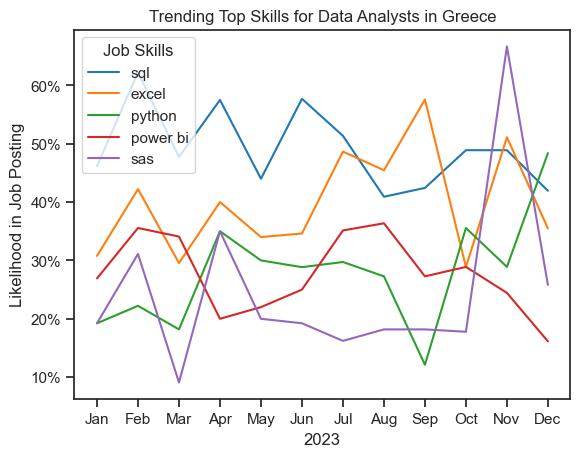

In [42]:
df_plot = df_gr_da_perc.iloc[:, :5]

sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False, palette='tab10')

plt.title('Trending Top Skills for Data Analysts in Greece')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend(title='Job Skills')

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.show()